# CONVOLUCIÓN 2D

En este módulo trabajaremos la convolución para señales de 2D (imágenes). Dividiremos el módulo en las siguientes secciones:


1. Convolución para explicar el cálculo matemático
2. Convolución para enfoque
3. Convolución para filtro de media
4. Convolución para detección de bordes
5. Convolución para suavizado gaussiano
6. Convolucíon en video

In [1]:
import os
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage import io

Creemos una matriz de 4x4 y un kernel de 2x2. 

In [2]:
Matriz = np.array([[1,1,1,1], [1,1,1,1], [0,0,0,0], [0,0,0,0]])
kernel = np.array([[1,1], [-1,-1]])
Matriz

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

Veamos el resultado de la operación de convolución

In [3]:
temp = signal.convolve2d(Matriz , kernel, mode='same')
temp

array([[ 1,  2,  2,  2],
       [ 0,  0,  0,  0],
       [-1, -2, -2, -2],
       [ 0,  0,  0,  0]])

# Convolución para el filtrado de imágenes

Función para calcular la convolución entre una imagen y un kernel. Se muestra la imagen original y la imagen filtrada

In [4]:
def show_convolve2d(imagen, kernel):
    
    %matplotlib notebook
    plt.ion()
    
    imagen_list = []
    for d in range(3):
        temp = signal.convolve2d(imagen[:,:,d] , kernel,  boundary='symm',mode='same')
        imagen_list.append(temp)

    imagen_filt = np.stack(imagen_list, axis=2)
    imagen_filt[imagen_filt > 255] = 255
    imagen_filt[imagen_filt < 0] = 0
    imagen_filt = imagen_filt.astype("uint8")

    plt.subplot(1,2,1)
    io.imshow(imagen_filt)
    plt.axis('off')

    plt.subplot(1,2,2)
    io.imshow(imagen)
    plt.axis('off')

    io.show()    

Cargamos una imagen del directorio

In [5]:
filename = os.path.join('4.data/', 'tito2.jpg')
imagen = io.imread(filename)

# 2. Enfoque

<IPython.core.display.Javascript object>


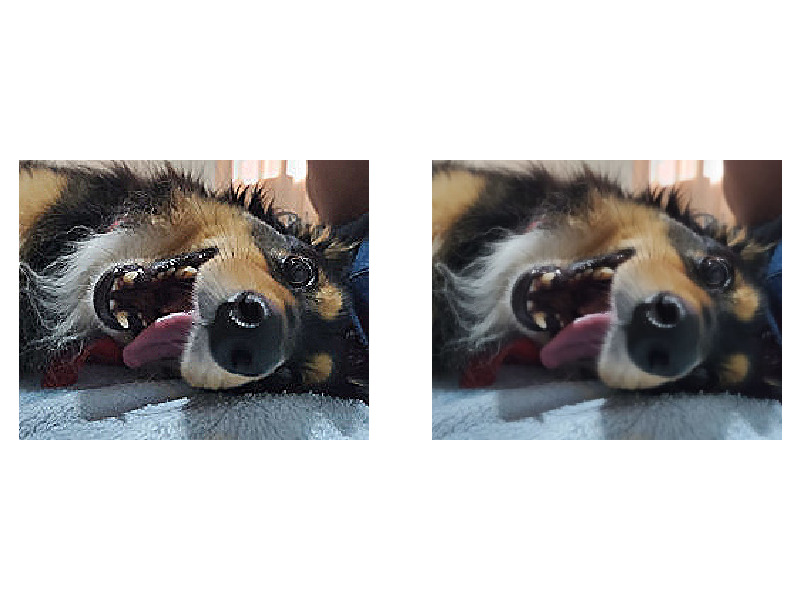

In [10]:
k=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
show_convolve2d(imagen,k)

# 3. Filtro de media

<IPython.core.display.Javascript object>


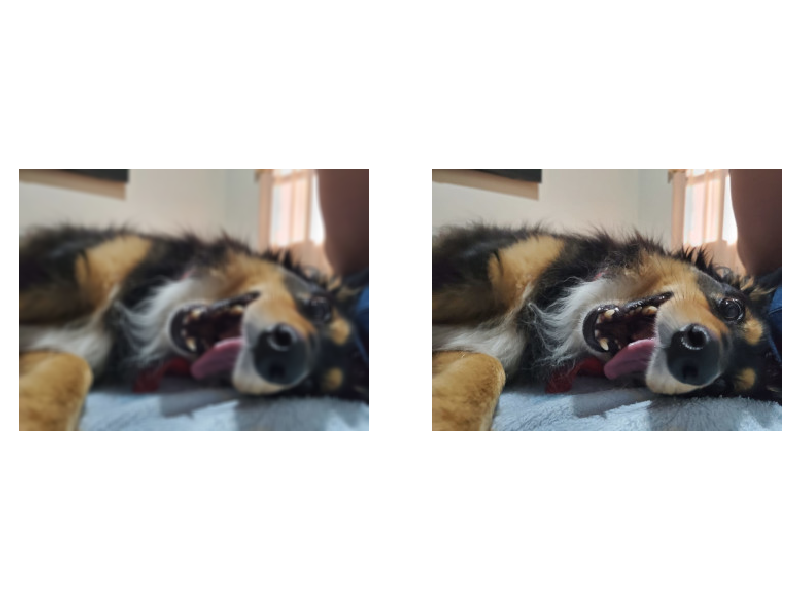

In [7]:
tam=5
k=np.ones((tam, tam))/(tam**2)
show_convolve2d(imagen,k)

# 4. Detección de bordes

<IPython.core.display.Javascript object>


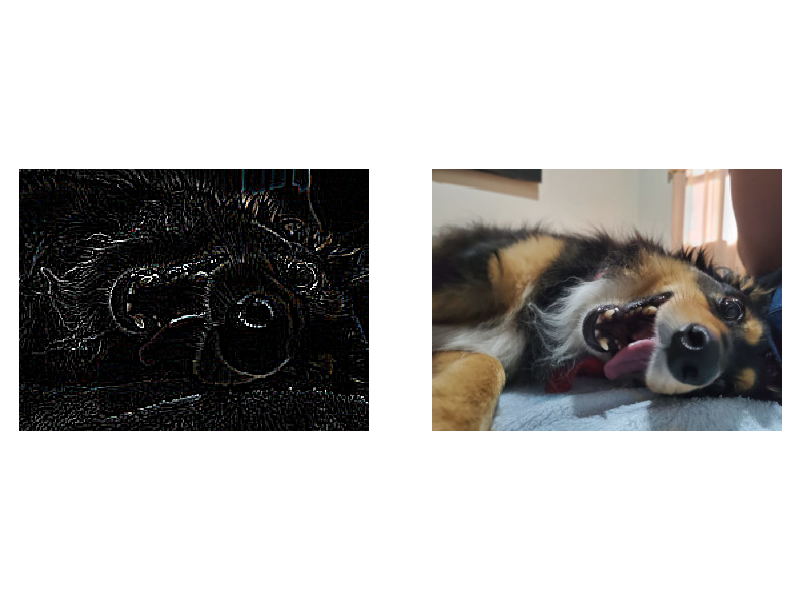

In [11]:
k=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
show_convolve2d(imagen ,k)

# 5. Suavizado

<IPython.core.display.Javascript object>


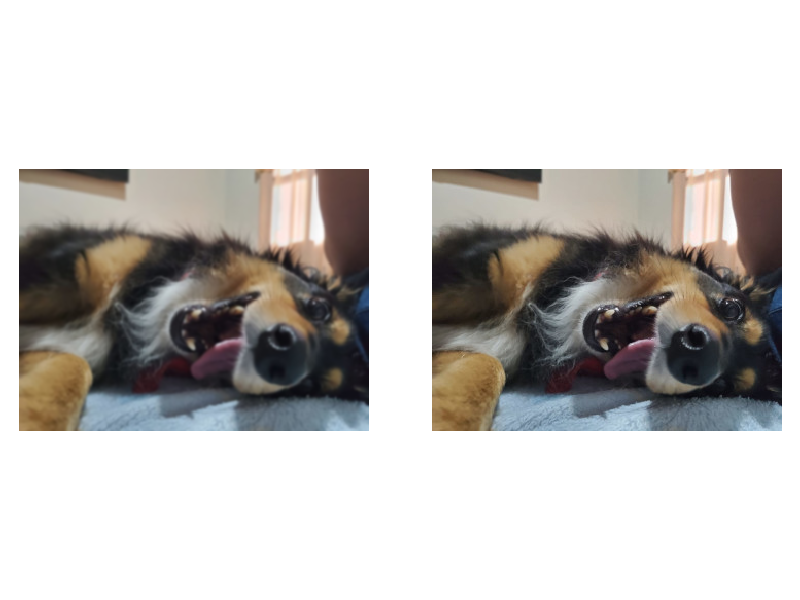

In [9]:
tam=5
k = signal.gaussian(tam, 1).reshape(-1, 1)@signal.gaussian(tam, 1).reshape(1, -1)
k=k/np.sum(k)
show_convolve2d(imagen ,k)   

# 6. Convolución en Video

Instalamos opencv

In [55]:
!pip install opencv-python

In [58]:
import cv2
# Tomamos la referencia de la cámara
camera = cv2.VideoCapture(0)

tam=5

## ENFOQUE
#kernel=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

## DESENFOQUE (FILTRO DE MEDIA)
#kernel=np.ones((tam, tam))/(tam**2)

## DETECCIÓN DE BORDES 
kernel=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

## SUAVIZADO GAUSSIANO
#kernel = signal.gaussian(tam, 1).reshape(-1, 1)@signal.gaussian(tam, 1).reshape(1, -1)
#kernel=kernel/np.sum(kernel)

while(True):
    # Leemos un frame de la cámara
    _, frame = camera.read()
    imagen = cv2.resize(frame,(500,400))

    # Calculamos la convolución entre la imagen y el kernel
    imagen_list = []
    for d in range(3):
        temp = signal.convolve2d(imagen[:,:,d] , kernel,  boundary='symm',mode='same')
        imagen_list.append(temp)

    imagen_filt = np.stack(imagen_list, axis=2)
    imagen_filt[imagen_filt > 255] = 255
    imagen_filt[imagen_filt < 0] = 0
    imagen_filt = imagen_filt.astype("uint8")
    
    
    cv2.imshow("Camara", imagen_filt)

    key = cv2.waitKey(1)

    # Salir de la captura de video si presionamos 'q'
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

In [141]:
camera.release()

# Taller

Implementar en imágenes y video filtros de bordes verticales y horizontales